<a href="https://colab.research.google.com/github/thabied/Mental-Health-Prediction/blob/master/Busara_Mental_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
train = pd.read_csv('/content/drive/My Drive/Hackathon/train.csv')
test = pd.read_csv('/content/drive/My Drive/Hackathon/test.csv')
sample = pd.read_csv('/content/drive/My Drive/Hackathon/sample_submission.csv')
explanations = pd.read_csv('/content/drive/My Drive/Hackathon/Variable_explanations.csv')

# EDA

In [0]:
train.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [0]:
train.shape

(1143, 75)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
surveyid                   1143 non-null int64
village                    1143 non-null int64
survey_date                1143 non-null object
femaleres                  1143 non-null int64
age                        1143 non-null float64
married                    1143 non-null int64
children                   1143 non-null int64
hhsize                     1143 non-null int64
edu                        1143 non-null int64
hh_children                1143 non-null int64
hh_totalmembers            809 non-null float64
cons_nondurable            1143 non-null float64
asset_livestock            1143 non-null float64
asset_durable              1143 non-null float64
asset_phone                1143 non-null float64
asset_savings              1143 non-null float64
asset_land_owned_total     1143 non-null float64
asset_niceroof             1143 non-null int64
cons_allfood               1143

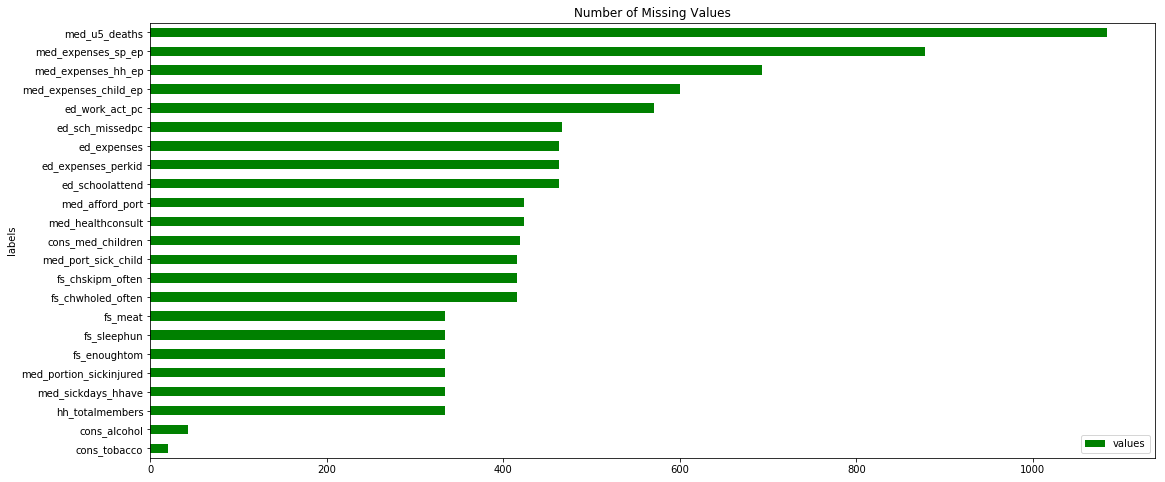

In [0]:
import matplotlib.pyplot as plt
train_labels = []
train_values = []

for col in train.columns:
  if train[col].isnull().sum() > 0:
    train_labels.append(col)
    train_values.append(train[col].isnull().sum())
  
data1 = list(zip(train_labels, train_values))
x1 = pd.DataFrame(data1, columns = ['labels','values'])
desc1 = x1.sort_values(by='values', ascending = True)
desc1.plot(x='labels', y='values',kind='barh', color='g', figsize=(18,8),title="Number of Missing Values", sort_columns=False)
plt.show()

In [0]:
missing_values = []
missing_categoricals = []

for i in train_labels:
  if type(i) == 'object':
    missing_categoricals.append(i)
  else:
    missing_values.append(i)   

In [0]:
missing_values

['hh_totalmembers',
 'cons_alcohol',
 'cons_tobacco',
 'cons_med_children',
 'fs_chskipm_often',
 'fs_chwholed_often',
 'fs_meat',
 'fs_enoughtom',
 'fs_sleephun',
 'med_expenses_hh_ep',
 'med_expenses_sp_ep',
 'med_expenses_child_ep',
 'med_portion_sickinjured',
 'med_port_sick_child',
 'med_afford_port',
 'med_sickdays_hhave',
 'med_healthconsult',
 'med_u5_deaths',
 'ed_expenses',
 'ed_expenses_perkid',
 'ed_schoolattend',
 'ed_sch_missedpc',
 'ed_work_act_pc']

In [0]:
len(missing_values)

23

In [0]:
missing_categoricals

[]

In [0]:
train['depressed'].mean()

0.16885389326334208

# Feature Engineering

In [0]:
X = train.drop(['depressed','survey_date'], axis=1)
y = train[['depressed']]

In [0]:
X = X.fillna(0)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Performance and Evaluation

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.


In [0]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

# Logistic Regression

In [0]:
lr = LogisticRegression()

In [0]:
lr_model = lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_pred = lr_model.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8296943231441049

In [0]:
def tune_model(X_train, y_train): 
    
    C_list = [0.001,0.01,0.1, 1,2,5,10]
    
    log = LogisticRegression()
    parameters = {'C':(C_list)}
    
    clf = GridSearchCV(log, parameters)
    best = clf.fit(X_train,y_train)
    return best.best_params_

tune_model(X_train, y_train)

In [0]:
logistic = LogisticRegression(C=0.001, class_weight='balanced',solver='liblinear', penalty='l1')

In [0]:
lr_model = lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_pred = lr_model.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8427947598253275

# Random Forest

In [0]:
rf = RandomForestClassifier(random_state=42)

In [0]:
rf_model = rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
y_pred = rf_model.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8078602620087336

In [0]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [0]:
# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   51.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [0]:
grid_result.best_params_

{'max_depth': 10, 'n_estimators': 2000}

In [0]:
# create the grid
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

# create the model with new max_depth and n_estimators
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   43.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [0]:
grid_result.best_params_

{'min_samples_leaf': 1}

In [0]:
# create the grid
max_features = [5, 8, 10, 12, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

In [0]:
# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [0]:
grid_result.best_params_

{'bootstrap': False, 'max_features': 5}

In [0]:
rf = RandomForestClassifier(max_depth = 10,
                            n_estimators = 2000,
                            min_samples_leaf = 1,
                            bootstrap = False,
                            max_features = 5,
                            random_state = 42
                            )

In [0]:
rf_model = rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
y_pred = rf_model.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8165938864628821

# Neural Network

In [0]:
def create_model(lyrs=[4], act='linear', opt='SGD', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [0]:
model = create_model()
print(model.summary())

W0701 17:39:20.113550 140232591574912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 17:39:20.115927 140232591574912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 17:39:20.124711 140232591574912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 17:39:20.151709 140232591574912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0701 17:39:20.170434 140232591574912 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 296       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

W0701 17:39:23.879765 140232591574912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.




val_acc: 82.19%


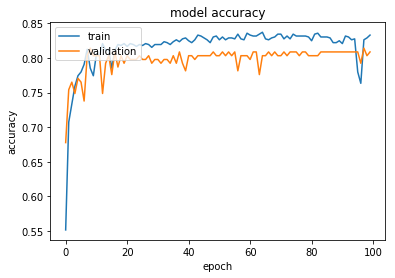

In [0]:
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [25, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] batch_size=16, epochs=25 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... batch_size=16, epochs=25, total=  10.3s
[CV] batch_size=16, epochs=25 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV] ......................... batch_size=16, epochs=25, total=  10.2s
[CV] batch_size=16, epochs=25 ........................................
[CV] ......................... batch_size=16, epochs=25, total=  10.1s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=  14.1s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=  14.0s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=  14.2s
[CV] batch_size=32, epochs=25 ........................................
[CV] ......................... batch_size=32, epochs=25, total=   8.4s
[CV] batch_size=32, epochs=25 ........................................
[CV] ......................... batch_size=32, epochs=25, total=   8.5s
[CV] batch_size=32, epochs=25 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.0min finished


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820569 using {'batch_size': 32, 'epochs': 50}
0.816193 (0.016540) with: {'batch_size': 16, 'epochs': 25}
0.816193 (0.002694) with: {'batch_size': 16, 'epochs': 50}
0.773523 (0.037834) with: {'batch_size': 32, 'epochs': 25}
0.820569 (0.010040) with: {'batch_size': 32, 'epochs': 50}
0.781182 (0.019967) with: {'batch_size': 64, 'epochs': 25}
0.788840 (0.013195) with: {'batch_size': 64, 'epochs': 50}


In [0]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   4.5s
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV] .......................................... opt=SGD, total=   4.6s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   4.6s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   5.0s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   5.3s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   5.1s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=   5.0s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=   5.1s
[CV] opt=Adagrad .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.7min finished


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844639 using {'opt': 'SGD'}
0.844639 (0.023041) with: {'opt': 'SGD'}
0.826039 (0.019036) with: {'opt': 'RMSprop'}
0.828228 (0.025179) with: {'opt': 'Adagrad'}
0.822757 (0.023496) with: {'opt': 'Adadelta'}
0.833698 (0.024584) with: {'opt': 'Adam'}
0.814004 (0.019685) with: {'opt': 'Nadam'}


In [0]:
seed(42)
set_random_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[4],[6],[8],[10], [8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] lyrs=[4] ........................................................
[CV] ......................................... lyrs=[4], total=  13.0s
[CV] lyrs=[4] ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


[CV] ......................................... lyrs=[4], total=  13.2s
[CV] lyrs=[4] ........................................................
[CV] ......................................... lyrs=[4], total=  13.3s
[CV] lyrs=[6] ........................................................
[CV] ......................................... lyrs=[6], total=  13.3s
[CV] lyrs=[6] ........................................................
[CV] ......................................... lyrs=[6], total=  13.4s
[CV] lyrs=[6] ........................................................
[CV] ......................................... lyrs=[6], total=  13.2s
[CV] lyrs=[8] ........................................................
[CV] ......................................... lyrs=[8], total=  13.4s
[CV] lyrs=[8] ........................................................
[CV] ......................................... lyrs=[8], total=  13.4s
[CV] lyrs=[8] ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.4min finished


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.818381 using {'lyrs': [4]}
0.818381 (0.013055) with: {'lyrs': [4]}
0.815098 (0.010961) with: {'lyrs': [6]}
0.817287 (0.006334) with: {'lyrs': [8]}
0.815098 (0.010570) with: {'lyrs': [10]}
0.808534 (0.007911) with: {'lyrs': [8, 4]}


In [0]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   8.7s
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] ........................................... dr=0.0, total=   8.4s
[CV] dr=0.0 ..........................................................


W0701 11:18:06.982786 139815125723008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


[CV] ........................................... dr=0.0, total=   8.5s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   8.8s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   8.9s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   9.4s
[CV] dr=0.05 .........................................................
[CV] .......................................... dr=0.05, total=   9.3s
[CV] dr=0.05 .........................................................
[CV] .......................................... dr=0.05, total=   9.2s
[CV] dr=0.05 .........................................................
[CV] .......................................... dr=0.05, total=   9.4s
[CV] dr=0.1 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.8min finished


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833698 using {'dr': 0.0}
0.833698 (0.024584) with: {'dr': 0.0}
0.816193 (0.023506) with: {'dr': 0.01}
0.820569 (0.033027) with: {'dr': 0.05}
0.811816 (0.023091) with: {'dr': 0.1}
0.810722 (0.022611) with: {'dr': 0.2}
0.827133 (0.029864) with: {'dr': 0.5}


In [0]:
# create final model
model = create_model(lyrs=[4], dr=0.0)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 296       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

914/914 [==============================] - 0s 39us/step

acc: 83.15%


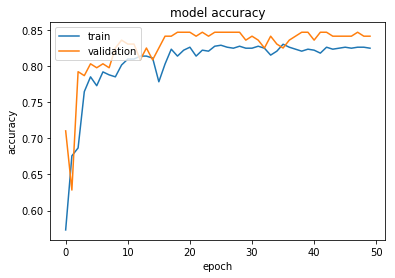

In [0]:
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = pd.DataFrame(y_pred, columns=['floats'])

In [0]:
y_pred['int'] = [1 if x>0.8 else 0 for x in y_pred['floats']]
#y['Mind'] = [1 if 'E' in x else 0 for x in new_train['type']]

In [0]:
y_pred.head()

,floats,int
0,0.254969,0
1,0.226333,0
2,0.163371,0
3,0.218267,0
4,0.224826,0


In [0]:
accuracy_score(y_test, y_pred['int'])

0.8296943231441049

# Predict on Test Set

In [0]:
test = pd.read_csv('/content/drive/My Drive/Hackathon/test.csv')

In [0]:
test_copy = test.copy()
test_copy = test_copy.drop(['survey_date','depressed'], axis=1)
test_copy = test_copy.fillna(0)
test_copy = test_copy.replace('.d', 0)

In [0]:
answer = lr_model.predict(test_copy)

In [0]:
answer = model.predict(test_copy)

In [0]:
answer = rf_model.predict(test_copy)

In [0]:
answer = pd.DataFrame(answer, columns=['depressed'])
answer.index = test.surveyid
#answer['depressed'] = answer['depressed'].apply(lambda x: round(x,0)).astype('int')

In [0]:
answer.head(20)

,depressed
surveyid,
901,0
498,0
710,0
433,0
44,0
172,0
1342,0
228,0
1421,0


In [0]:
from google.colab import files
answer.to_csv('sub8.csv')
files.download('sub8.csv')